**"Loading essential libraries including Pandas for data handling, NumPy for numerical operations, Seaborn for statistical visualization, and Matplotlib for plotting in Python."**

In [67]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**"Loading the dataset 'tips.csv' into a Pandas DataFrame and displaying the first few rows to inspect the initial records."**

In [64]:
# Loading the dataset 'tips.csv' into a Pandas DataFrame
data = pd.read_csv("tips.csv")
# Displaying the first few rows of the dataset to examine its structure and content
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Created an SQLite database in memory and loaded the DataFrame 'data' into it with the table name 'df'.**

In [65]:
import sqlite3

# Create a SQLite database in memory
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Load the DataFrame into the SQLite database
data.to_sql('df', conn, index=False, if_exists='replace')


244

**Visualizing the distribution of total bills from the 'df' dataset using a histogram with 10 bins.**

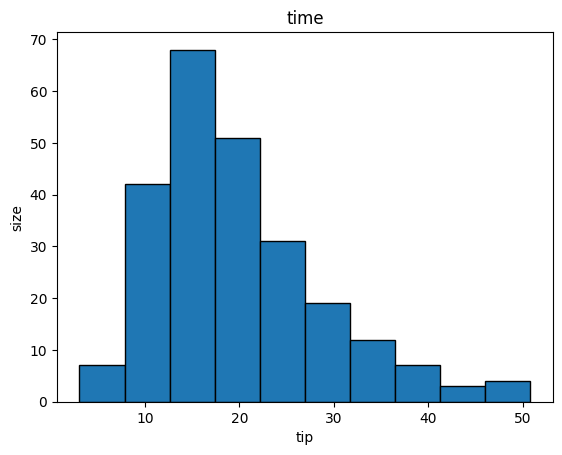

In [66]:
import matplotlib.pyplot as plt

query = "SELECT total_bill FROM df"
sa = pd.read_sql(query, conn)

plt.hist(sa['total_bill'], bins=10, edgecolor='k')
plt.xlabel('tip')
plt.ylabel('size')
plt.title('time')
plt.show()


**"SQL query counts the occurrences of each 'total_bill' category in the 'df' dataset, followed by a bar plot displaying the frequency of different total bill categories."**

     total_bill  count
0          3.07      1
1          5.75      1
2          7.25      2
3          7.51      1
4          7.56      1
..          ...    ...
224       45.35      1
225       48.17      1
226       48.27      1
227       48.33      1
228       50.81      1

[229 rows x 2 columns]


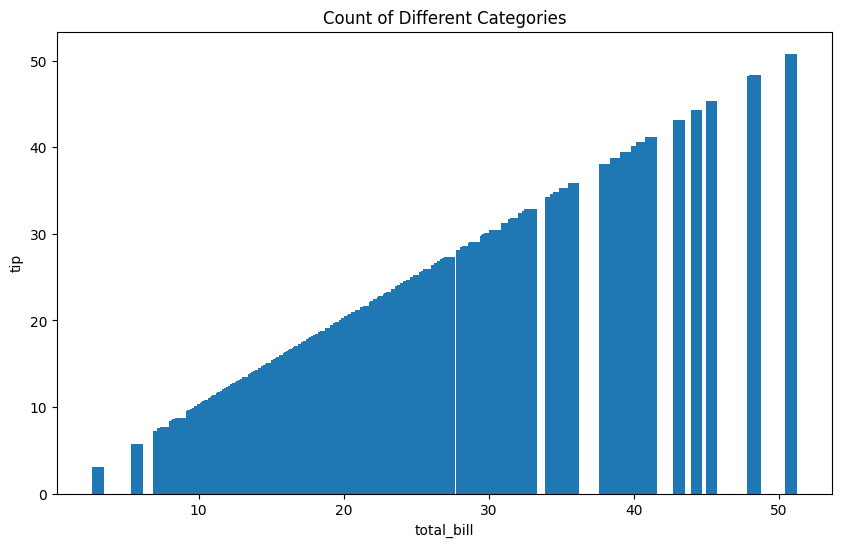

In [16]:
# SQL query to count categories
query = """
SELECT total_bill, COUNT(*) as count
FROM df
GROUP BY total_bill
"""
category_counts = pd.read_sql(query, conn)
print(category_counts)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(category_counts['total_bill'], category_counts['total_bill'])
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('Count of Different Categories')
plt.show()


**"Executing an SQL query to count the total number of entries in the 'df' dataset and displaying the result using pandas."**

In [19]:
# SQL query to count total entries in the 'df' dataset
query = "SELECT COUNT(*) AS total_bill FROM df"
total = pd.read_sql(query, conn)
total


,total_bill
0,244


**"Executing an SQL query to calculate the average total bill from the 'df' dataset and displaying the result using pandas."**

In [21]:
# SQL query to calculate the average total bill in the 'df' dataset
query = "SELECT AVG(total_bill) AS total_bill FROM df"
average = pd.read_sql(query, conn)
average


,total_bill
0,19.785943


**"Executing an SQL query to count the number of records by gender in the 'df' dataset and displaying the results using pandas."**

In [24]:
# SQL query to count the number of records by gender in the 'df' dataset
query = "SELECT sex, COUNT(*) AS count FROM df GROUP BY sex"
gender_count = pd.read_sql(query, conn)
gender_count


,sex,count
0,Female,87
1,Male,157


**"A bar chart illustrating the number of people categorized by gender, based on data retrieved from the 'gender_count' DataFrame using Seaborn and Matplotlib."**

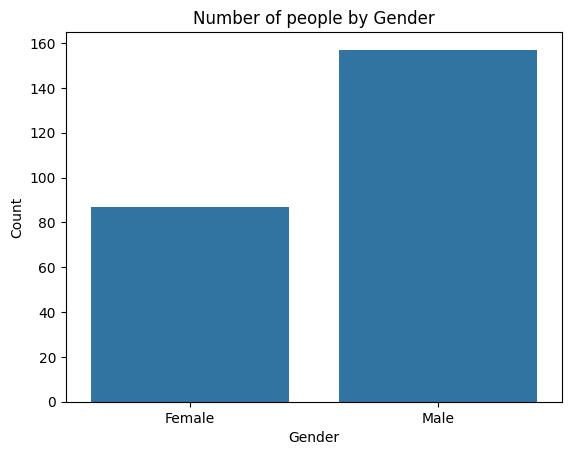

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart displaying the number of people by gender
sns.barplot(x='sex', y='count', data=gender_count)
plt.title('Number of people by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**"A histogram depicting the distribution of gender counts based on data from the 'gender_count' DataFrame. Each bar represents the frequency of counts across 10 bins, with black edges delineating each bar."**

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

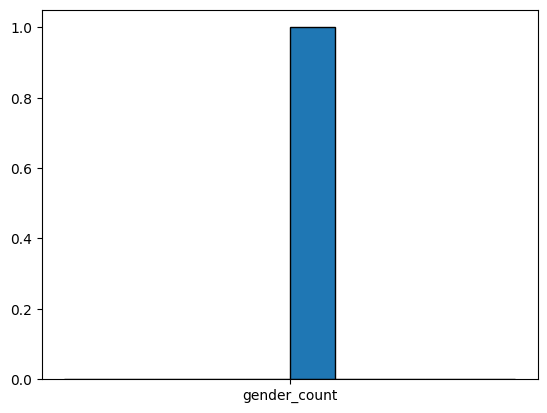

In [31]:
# Histogram of 'gender_count' data with 10 bins and black edges
plt.hist(x = 'gender_count', bins=10, edgecolor='black')
#plt.title('Distribution\' Female')
#plt.xlabel('tip')
#plt.ylabel('count')
#plt.show()


**"A pie chart displaying the distribution of records categorized by gender, where each slice represents the percentage of records for each gender category from the 'gender_count' DataFrame."**

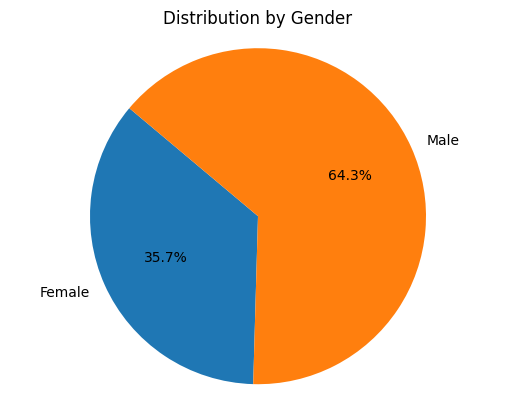

In [33]:
# Pie chart illustrating the distribution of records by gender
plt.pie(gender_count['count'], labels=gender_count['sex'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**"A box plot depicting the distribution of total bills across different days, based on data retrieved from the 'df' dataset using an SQL query. Each box represents the interquartile range (IQR) of total bills for a specific day, with whiskers extending to show the range of the data."**

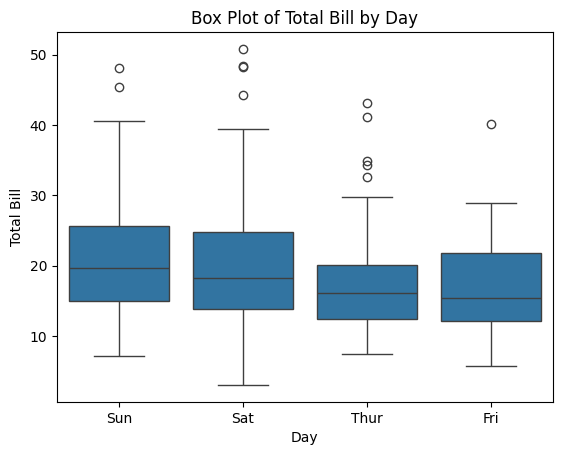

In [52]:
# SQL query to retrieve total bill data by day from the 'df' dataset
query = "SELECT day, total_bill FROM df"
total_bill_day_df = pd.read_sql(query, conn)

# Box plot illustrating the distribution of total bills across different days
sns.boxplot(x='day', y='total_bill', data=total_bill_day_df)
plt.title('Box Plot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()



**"A scatter plot depicting the relationship between total bill and tip amounts, based on data retrieved from the 'df' dataset using an SQL query. Each point on the plot represents a combination of total bill and tip values."**

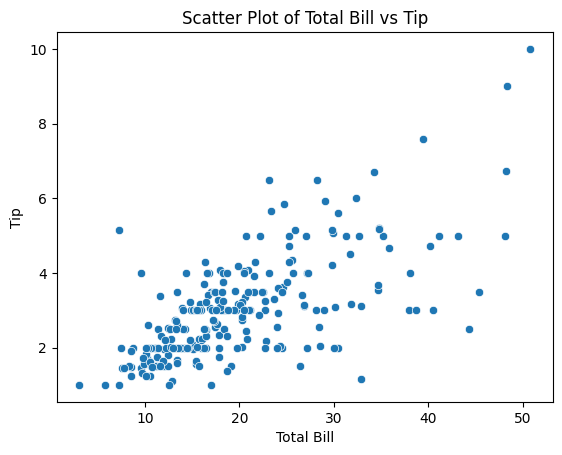

In [54]:
# SQL query to retrieve total bill and tip data from the 'df' dataset
query = "SELECT total_bill, tip FROM df"
total_bill_tip_df = pd.read_sql(query, conn)

# Scatter plot illustrating the relationship between total bill and tip
sns.scatterplot(x='total_bill', y='tip', data=total_bill_tip_df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

**"A bar chart showing the average tip amount for each day of the week, based on data retrieved from the 'df' dataset using an SQL query. Each bar represents the average tip amount for a specific day."**

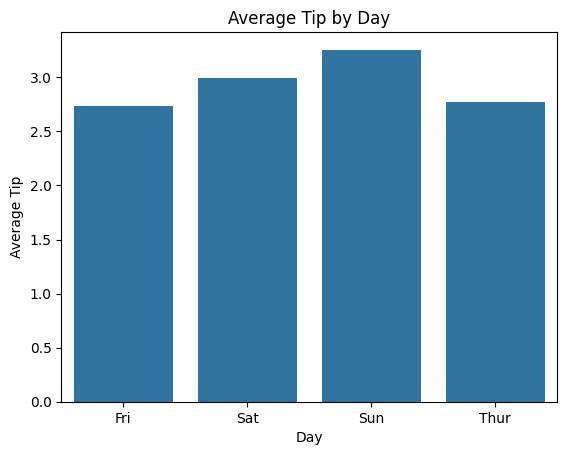

In [56]:
# SQL query to calculate the average tip by day from the 'df' dataset
query = "SELECT day, AVG(tip) as average_tip FROM df GROUP BY day"
average_tip_day_df = pd.read_sql(query, conn)

# Bar chart illustrating the average tip amount by day
sns.barplot(x='day', y='average_tip', data=average_tip_day_df)
plt.title('Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

**"A bar chart displaying the average tip amount by day of the week, based on data retrieved from the 'df' dataset using an SQL query. Each bar represents the average tip for a specific day."**

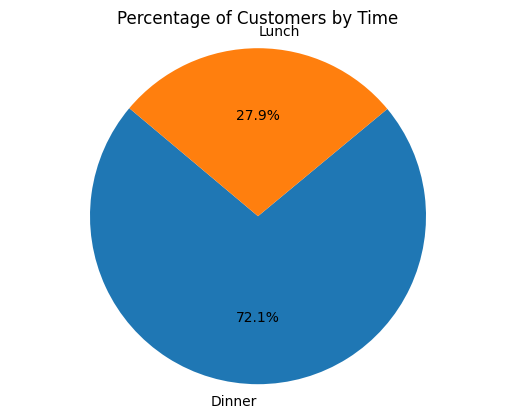

In [57]:
# Perform SQL query to get customers count by time
query = "SELECT time, COUNT(*) as count FROM df GROUP BY time"
time_df = pd.read_sql(query, conn)

# Pie chart of customers by time
plt.pie(time_df['count'], labels=time_df['time'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Customers by Time')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**"A count plot displaying the number of smokers and non-smokers in the dataset, based on data retrieved using an SQL query from the 'df' dataset. The bars represent the count of individuals categorized as smokers and non-smokers."**

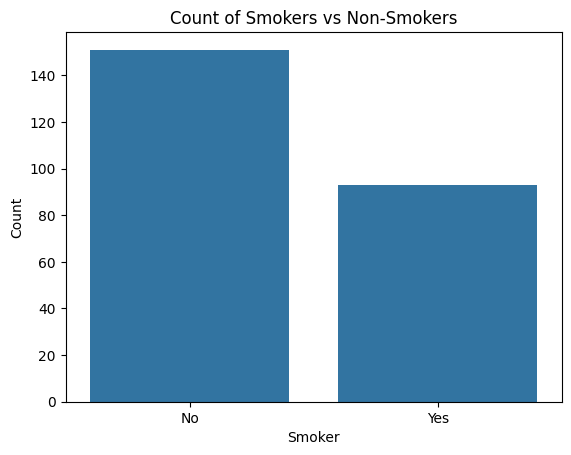

In [58]:
# SQL query to count smokers and non-smokers from the 'df' dataset
query = "SELECT smoker, COUNT(*) as count FROM df GROUP BY smoker"
smoker_df = pd.read_sql(query, conn)

# Count plot illustrating the number of smokers and non-smokers
sns.barplot(x='smoker', y='count', data=smoker_df)
plt.title('Count of Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

**"A bar chart depicting the total bill amount categorized by sex, based on data retrieved from the 'df' dataset using an SQL query. Each bar represents the sum of total bills for either male or female individuals."**

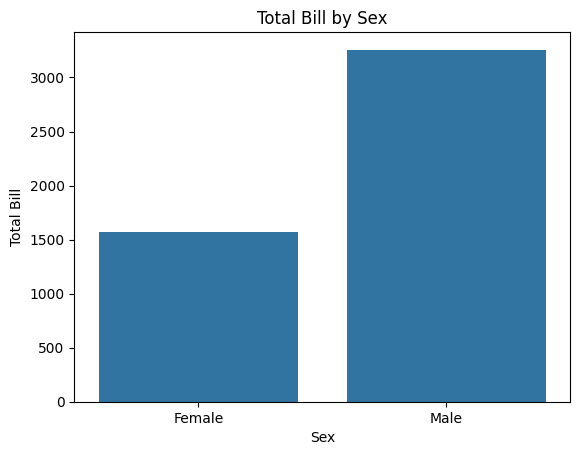

In [59]:
# SQL query to calculate the total bill by sex from the 'df' dataset
query = "SELECT sex, SUM(total_bill) as total_bill_sum FROM df GROUP BY sex"
total_bill_sex_df = pd.read_sql(query, conn)

# Bar chart illustrating the total bill by sex
sns.barplot(x='sex', y='total_bill_sum', data=total_bill_sex_df)
plt.title('Total Bill by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Bill')
plt.show()

**"A histogram illustrating the distribution of tips based on data retrieved from the 'df' dataset using an SQL query. The histogram is divided into 10 bins, with black edges outlining each bar."**

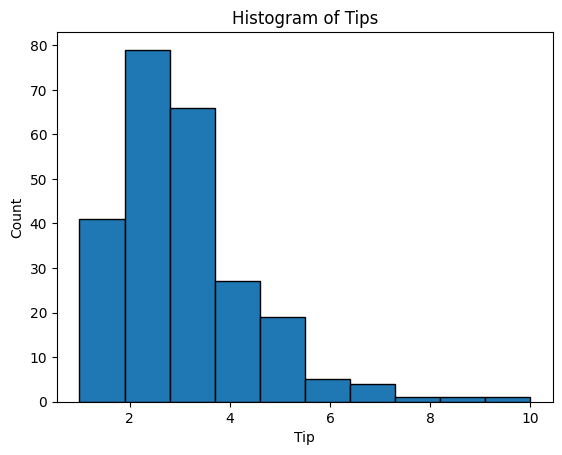

In [60]:
# SQL query to retrieve tips data from the 'df' dataset
query = "SELECT tip FROM df"
tips_df = pd.read_sql(query, conn)

# Histogram depicting the distribution of tips
plt.hist(tips_df['tip'], bins=10, edgecolor='black')
plt.title('Histogram of Tips')
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()


**"A bar chart illustrating the average total bill amount for different party sizes, based on data retrieved from the 'df' dataset using an SQL query. Each bar represents the average total bill for a specific size group."**

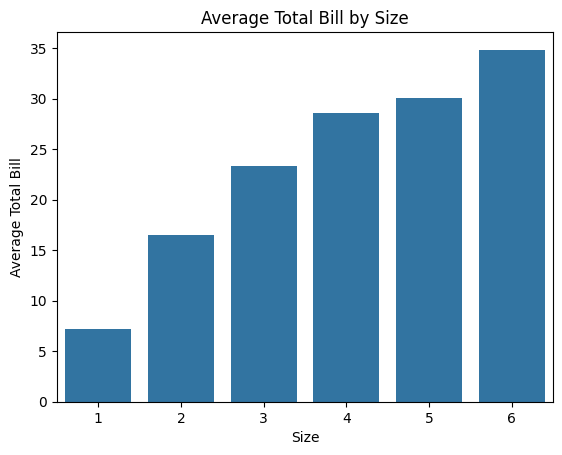

In [61]:
# SQL query to calculate the average total bill by size from the 'df' dataset
query = "SELECT size, AVG(total_bill) as avg_total_bill FROM df GROUP BY size"
avg_total_bill_size_df = pd.read_sql(query, conn)

# Bar chart illustrating the average total bill by size
sns.barplot(x='size', y='avg_total_bill', data=avg_total_bill_size_df)
plt.title('Average Total Bill by Size')
plt.xlabel('Size')
plt.ylabel('Average Total Bill')
plt.show()


**"A scatter plot depicting the relationship between tip amounts and party sizes, based on data retrieved from the 'df' dataset using an SQL query. Each point on the plot represents a combination of party size and tip amount."**

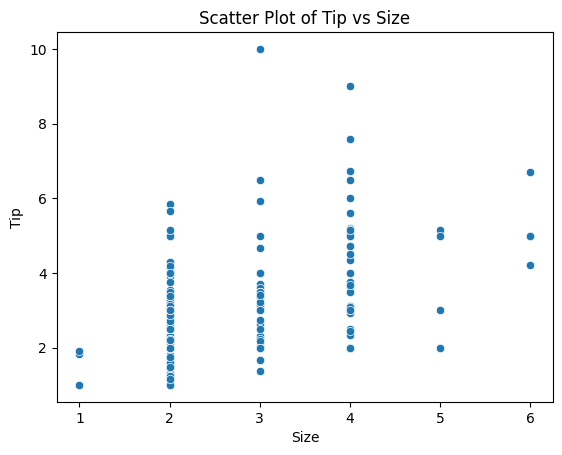

In [62]:
# SQL query to retrieve size and tip data from the 'df' dataset
query = "SELECT size, tip FROM df"
tip_size_df = pd.read_sql(query, conn)

# Scatter plot illustrating the relationship between tip and party size
sns.scatterplot(x='size', y='tip', data=tip_size_df)
plt.title('Scatter Plot of Tip vs Size')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()

**"A scatter plot depicting the relationship between tip amounts and party sizes, based on data retrieved from the 'df' dataset using an SQL query. Each point on the plot represents a combination of party size and tip amount."**

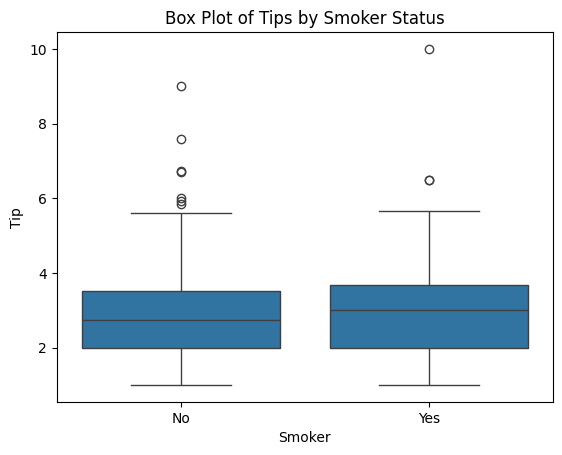

In [63]:
# SQL query to retrieve size and tip data from the 'df' dataset
query = "SELECT smoker, tip FROM df"
tip_smoker_df = pd.read_sql(query, conn)

# Scatter plot illustrating the relationship between tip and party size
sns.boxplot(x='smoker', y='tip', data=tip_smoker_df)
plt.title('Box Plot of Tips by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.show()